In [3]:
#Import libraries
import numpy as np
import pandas as pd

In [4]:
#Reading the file
data = pd.read_csv("C:/Users/Thiyaneswaran_Manoha/Downloads/Survey-1.csv")
data.head()

,ID,Gender,Age,Class,Major,Grad Intention,GPA,Employment,Salary,Social Networking,Satisfaction,Spending,Computer,Text Messages
0,1,Female,20,Junior,Other,Yes,2.9,Full-Time,50.0,1,3,350,Laptop,200
1,2,Male,23,Senior,Management,Yes,3.6,Part-Time,25.0,1,4,360,Laptop,50
2,3,Male,21,Junior,Other,Yes,2.5,Part-Time,45.0,2,4,600,Laptop,200
3,4,Male,21,Junior,CIS,Yes,2.5,Full-Time,40.0,4,6,600,Laptop,250
4,5,Male,23,Senior,Other,Undecided,2.8,Unemployed,40.0,2,4,500,Laptop,100


In [26]:
#Conditonal Probability
def condprob(colname2,filename,Gender):
    #Contin table Gender vs Colname
    crosstabdf=pd.crosstab(data['Gender'],data[colname2] )
    crosstabdf.to_csv("D:/GL/SWDMAssignmentFinal/"+ filename +".csv")
    datatab = pd.read_csv("D:/GL/SWDMAssignmentFinal/"+ filename +".csv")
    print("Contingency Table",datatab.head())

    #Condtional probablities
    datagend=datatab.set_index('Gender')
    sum_row=datagend.sum(axis=1)
    print("Conditional Probability table",datagend.loc[[Gender],:]/sum_row[Gender])
    
print("Conditional Probability between Male and Major")
condprob('Major','gendmajdf','Male')
print("Conditional Probability between FeMale and Major")
condprob('Major','gendmajdf','Female')
print("Conditional Probability between Male and grad Intention")
condprob('Grad Intention','gendgraddf','Male')
print("Conditional Probability between FeMale and grad Intention")
condprob('Grad Intention','gendgraddf','Female')
print("Conditional Probability between Male and Employment")
condprob('Employment','gendempdf','Male')
print("Conditional Probability between FeMale and Employment")
condprob('Employment','gendempdf','Female')
print("Conditional Probability between Male and Computer")
condprob('Computer','gendcompdf','Male')
print("Conditional Probability between FeMale and Computer")
condprob('Computer','gendcompdf','Female')


Conditional Probability between Male and Major
Contingency Table    Gender  Accounting  CIS  Economics/Finance  International Business  \
0  Female           3    3                  7                       4   
1    Male           4    1                  4                       2   

   Management  Other  Retailing/Marketing  Undecided  
0           4      3                    9          0  
1           6      4                    5          3  
Conditional Probability table         Accounting       CIS  Economics/Finance  International Business  \
Gender                                                                    
Male      0.137931  0.034483           0.137931                0.068966   

        Management     Other  Retailing/Marketing  Undecided  
Gender                                                        
Male      0.206897  0.137931             0.172414   0.103448  
Conditional Probability between FeMale and Major
Contingency Table    Gender  Accounting  CIS  Economics/

In [4]:
#Outlier count
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).sum()

Age                  1
Class                0
Computer             0
Employment           0
GPA                  0
Gender               0
Grad Intention       0
ID                   0
Major                0
Salary               3
Satisfaction         9
Social Networking    2
Spending             2
Text Messages        5
dtype: int64

In [5]:
#Covariance
data.cov()

,ID,Age,GPA,Salary,Social Networking,Satisfaction,Spending,Text Messages
ID,325.500000,-1.950820,0.696721,-11.221311,-1.803279,-0.868852,-185.122951,534.221311
Age,-1.950820,2.048652,0.015865,-0.268641,0.014278,-0.080910,10.473295,-69.912745
GPA,0.696721,0.015865,0.142422,-1.407166,-0.062771,0.017451,-28.764410,3.415124
Salary,-11.221311,-0.268641,-1.407166,145.948440,0.179535,-2.888948,9.122158,-190.797197
Social Networking,-1.803279,0.014278,-0.062771,0.179535,0.712850,0.020624,13.696457,3.791645
Satisfaction,-0.868852,-0.080910,0.017451,-2.888948,0.020624,1.473295,24.381280,46.218932
Spending,-185.122951,10.473295,-28.764410,9.122158,13.696457,24.381280,49263.491539,1356.127710
Text Messages,534.221311,-69.912745,3.415124,-190.797197,3.791645,46.218932,1356.127710,45995.643839


In [9]:
#Contingency Table-Gender vs Major
table2=pd.pivot_table(data,index =['Gender'], 
                         columns =['Major'], aggfunc={'Major':[np.size]})
                                                        
pd.set_option('display.max_columns',60)
table2

Major                                                           \
             size                                                            
Major  Accounting  CIS Economics/Finance International Business Management   
Gender                                                                       
Female        3.0  3.0               7.0                    4.0        4.0   
Male          4.0  1.0               4.0                    2.0        6.0   

                                            
                                            
Major  Other Retailing/Marketing Undecided  
Gender                                      
Female   3.0                 9.0       NaN  
Male     4.0                 5.0       3.0

In [15]:
#Contingency Table-Gender vs Major
table = pd.pivot_table(data, index=['Gender'],columns = ['Major'],
                      aggfunc=np.size,margins=True)
table

Age                                                           \
Major  Accounting  CIS Economics/Finance International Business Management   
Gender                                                                       
Female        3.0  3.0               7.0                    4.0        4.0   
Male          4.0  1.0               4.0                    2.0        6.0   
All           7.0  4.0              11.0                    6.0       10.0   

                                                    Class       \
Major  Other Retailing/Marketing Undecided All Accounting  CIS   
Gender                                                           
Female   3.0                 9.0       NaN  33        3.0  3.0   
Male     4.0                 5.0       3.0  29        4.0  1.0   
All      7.0                14.0       3.0  62        7.0  4.0   

                                                                  \
Major  Economics/Finance International Business Management Other   
Gender                                                             
Female               7.0                    4.0        4.0   3.0   
Male                 4.0                    2.0        6.0   4.0   
All                 11.0                    6.0       10.0   7.0   

                                           Computer                         \
Major  Retailing/Marketing Undecided All Accounting  CIS Economics/Finance   
Gender                                                                       
Female                 9.0       NaN  33        3.0  3.0               7.0   
Male                   5.0       3.0  29        4.0  1.0               4.0   
All                   14.0       3.0  62        7.0  4.0              11.0   

                                                                              \
Major  International Business Management Other Retailing/Marketing Undecided   
Gender                                                                         
Female                    4.0        4.0   3.0                 9.0       NaN   
Male                      2.0        6.0   4.0                 5.0       3.0   
All                       6.0       10.0   7.0                14.0       3.0   

           Employment                         ...        Satisfaction  \
Major  All Accounting  CIS Economics/Finance  ... Retailing/Marketing   
Gender                                        ...                       
Female  33        3.0  3.0               7.0  ...                 9.0   
Male    29        4.0  1.0               4.0  ...                 5.0   
All     62        7.0  4.0              11.0  ...                14.0   

                     Social Networking                         \
Major  Undecided All        Accounting  CIS Economics/Finance   
Gender                                                          
Female       NaN  33               3.0  3.0               7.0   
Male         3.0  29               4.0  1.0               4.0   
All          3.0  62               7.0  4.0              11.0   

                                                                              \
Major  International Business Management Other Retailing/Marketing Undecided   
Gender                                                                         
Female                    4.0        4.0   3.0                 9.0       NaN   
Male                      2.0        6.0   4.0                 5.0       3.0   
All                       6.0       10.0   7.0                14.0       3.0   

             Spending                                                \
Major  All Accounting  CIS Economics/Finance International Business   
Gender                                                                
Female  33        3.0  3.0               7.0                    4.0   
Male    29        4.0  1.0               4.0                    2.0   
All     62        7.0  4.0              11.0                    6.0   

                                                   

In [16]:
#Contingency Table-Gender vs Grad Intention
table2=pd.pivot_table(data,index =['Gender'], 
                         columns =['Grad Intention'], aggfunc={'Grad Intention':[np.size]})
                                                        
pd.set_option('display.max_columns',60)
table2

Grad Intention              
                         size              
Grad Intention             No Undecided Yes
Gender                                     
Female                      9        13  11
Male                        3         9  17

In [17]:
#Contingency Table-Gender vs Employment
table2=pd.pivot_table(data,index =['Gender'], 
                         columns =['Employment'], aggfunc={'Employment':[np.size]})
                                                        
pd.set_option('display.max_columns',60)
table2

Employment                     
                 size                     
Employment  Full-Time Part-Time Unemployed
Gender                                    
Female              3        24          6
Male                7        19          3

In [20]:
#Contingency Table-Gender vs Entire table
table2=pd.pivot_table(data,index =['Gender'], 
                         columns =['Major','Grad Intention','Employment','Computer'], aggfunc={'Major':[np.size],
                                                                                               'Grad Intention':[np.size],
                                                                                               'Employment':[np.size],
                                                                                               'Computer':[np.size],
                                                                                              })
                                                        
pd.set_option('display.max_columns',60)
table2

Computer                                                  \
                     size                                                   
Major          Accounting                                             CIS   
Grad Intention  Undecided                  Yes                         No   
Employment      Part-Time Unemployed Full-Time Part-Time        Part-Time   
Computer           Laptop     Laptop   Desktop   Desktop Laptop    Laptop   
Gender                                                                      
Female                NaN        NaN       NaN       1.0    2.0       2.0   
Male                  1.0        1.0       1.0       NaN    1.0       NaN   

                                                                           \
                                                                            
Major                              Economics/Finance                        
Grad Intention Undecided       Yes                No Undecided              
Employment     Part-Time Full-Time         Part-Time Part-Time Unemployed   
Computer          Laptop    Laptop            Laptop    Laptop     Laptop   
Gender                                                                      
Female               1.0       NaN               1.0       2.0        1.0   
Male                 NaN       1.0               NaN       1.0        NaN   

                                                                            \
                                                                             
Major                              International Business                    
Grad Intention       Yes                               No        Undecided   
Employment     Full-Time Part-Time              Part-Time        Part-Time   
Computer          Laptop    Laptop                Desktop Laptop   Desktop   
Gender                                                                       
Female               1.0       2.0                    1.0    1.0       NaN   
Male                 1.0       2.0                    NaN    NaN       1.0   

                                                                            \
                                                                             
Major                           Management                                   
Grad Intention              Yes         No            Undecided              
Employment            Part-Time  Part-Time Unemployed Part-Time Unemployed   
Computer       Laptop    Laptop     Laptop     Tablet    Laptop     Laptop   
Gender                                                                       
Female            NaN       2.0        NaN        1.0       1.0        1.0   
Male              1.0       NaN        1.0        NaN       1.0        NaN   

                                                                              \
                                                                               
Major                                             Other                        
Grad Intention       Yes                      Undecided                        
Employment     Full-Time Part-Time Unemployed Full-Time Part-Time Unemployed   
Computer          Laptop    Laptop     Laptop    Tablet    Laptop     Laptop   
Gender                                                                         
Female               NaN       NaN        1.0       1.0       1.0        NaN   
Male                 1.0       3.0        NaN       NaN       NaN        1.0   

                                    ...             Major                      \
                                    ...              size                       
Major                               ... Economics/Finance                       
Grad Intention       Yes            ...         Undecided       Yes             
Employment     Full-Time Part-Time  ...        Unemployed Full-Time Part-Time   
Computer          Laptop   Desktop  ...            Laptop    Laptop    Laptop   
Gender          

In [19]:
#Contingency Table-Gender vs Computer
table2=pd.pivot_table(data,index =['Gender'], 
                         columns =['Computer'], aggfunc={'Computer':[np.size]})
                                                        
pd.set_option('display.max_columns',60)
table2

Computer              
             size              
Computer  Desktop Laptop Tablet
Gender                         
Female        2.0   29.0    2.0
Male          3.0   26.0    NaN

In [24]:
#What is the probability that a randomly selected CMSU student will be male&Female?
Pr_male=3+26
Tot_pr=2+29+2+3+26
Pr=Pr_male/Tot_pr
print(Pr)
Pr_Female=2+29+2
PrF=Pr_Female/Tot_pr
print(PrF)
print(1-Pr)

0.46774193548387094
0.532258064516129
0.532258064516129


In [ ]:
#Find the conditional probability of different majors among the male students in CMSU.
#Pr(diff majors/gender male students)

Pr_(accountingmajor_male)=4/29


In [1]:
import pandas as pd
import seaborn as sb
from matplotlib import pyplot as plt

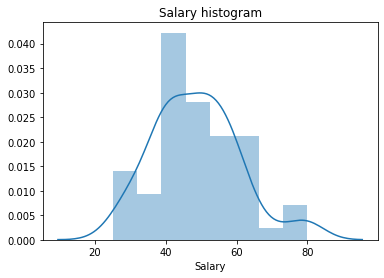

In [9]:
sb.distplot(data['Salary'])
plt.title("Salary histogram")
plt.show()

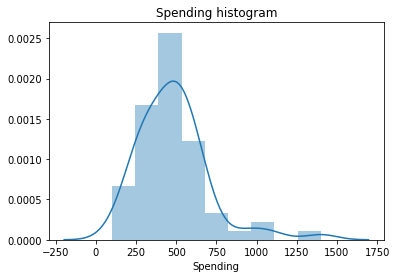

In [10]:
sb.distplot(data['Spending'])
plt.title("Spending histogram")
plt.show()

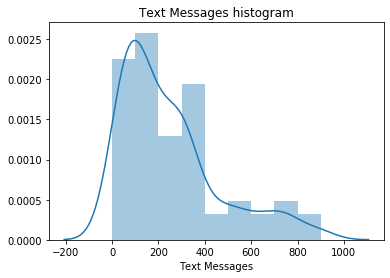

In [11]:
sb.distplot(data['Text Messages'])
plt.title("Text Messages histogram")
plt.show()

In [12]:
#Skewness
data.skew()

ID                   0.000000
Age                  0.736533
GPA                 -0.314600
Salary               0.534701
Social Networking    0.961056
Satisfaction        -0.505437
Spending             1.585915
Text Messages        1.295808
dtype: float64

In [13]:
#Kurtosis
data.kurt()

ID                  -1.200000
Age                  1.396513
GPA                 -0.504044
Salary               0.424264
Social Networking    1.104052
Satisfaction         0.469420
Spending             4.559914
Text Messages        1.135685
dtype: float64

In [14]:
#Info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 14 columns):
ID                   62 non-null int64
Gender               62 non-null object
Age                  62 non-null int64
Class                62 non-null object
Major                62 non-null object
Grad Intention       62 non-null object
GPA                  62 non-null float64
Employment           62 non-null object
Salary               62 non-null float64
Social Networking    62 non-null int64
Satisfaction         62 non-null int64
Spending             62 non-null int64
Computer             62 non-null object
Text Messages        62 non-null int64
dtypes: float64(2), int64(6), object(6)
memory usage: 6.9+ KB


In [15]:
#Describe
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,62.0,31.500000,18.041619,1.0,16.25,31.50,46.75,62.0
Age,62.0,21.129032,1.431311,18.0,20.00,21.00,22.00,26.0
GPA,62.0,3.129032,0.377388,2.3,2.90,3.15,3.40,3.9
Salary,62.0,48.548387,12.080912,25.0,40.00,50.00,55.00,80.0
Social Networking,62.0,1.516129,0.844305,0.0,1.00,1.00,2.00,4.0
Satisfaction,62.0,3.741935,1.213793,1.0,3.00,4.00,4.00,6.0
Spending,62.0,482.016129,221.953805,100.0,312.50,500.00,600.00,1400.0
Text Messages,62.0,246.209677,214.465950,0.0,100.00,200.00,300.00,900.0


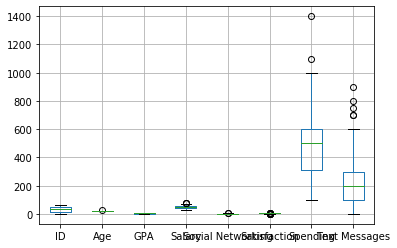

In [16]:
#Boxplot
data.boxplot()

In [21]:
z=48.548387-50/12.080912
z

44.40962661502244

In [22]:
import scipy.stats as stats
stats.norm.cdf(z)

1.0

In [23]:
stats.norm.cdf(48.548387,loc=50,scale=12.080912)

0.4521791651714647

In [33]:
#c) The probability between points can be calculated by taking differences 

stats.norm.cdf(80,loc=48.548387,scale=12.080912)-stats.norm.cdf(25,loc=48.548387,scale=12.080912)

0.9697505541421642

In [25]:
stats.norm.cdf(1400,loc=482.016129,scale=221.953805)-stats.norm.cdf(100,loc=482.016129,scale=221.953805)

0.9573706573191861

In [34]:
#stats.norm.cdf(data['Spending'].max(),loc=data['Spending'].mean(),scale=data['Spending'].std()-stats.norm.cdf(data['Spending'].min(),loc=data['Spending'].mean(),scale=data['Spending'].std()
def statscdf(colname):
    max=data[colname].max()
    min=data[colname].min()
    mean=data[colname].mean()
    std=data[colname].std()
    print(max,min,mean,std)
    print(stats.norm.cdf(max,loc=mean,scale=std)-stats.norm.cdf(min,loc=mean,scale=std))

print("Salary")
statscdf('Salary')

print("Spending")
statscdf('Spending')

print("Text Messages")
statscdf('Text Messages')


Salary
80.0 25.0 48.54838709677419 12.080912216337277
0.9697505518014508
Spending
1400 100 482.01612903225805 221.95380496596204
0.9573706573563489
Text Messages
900 0 246.20967741935485 214.4659503026961
0.8733682831718741


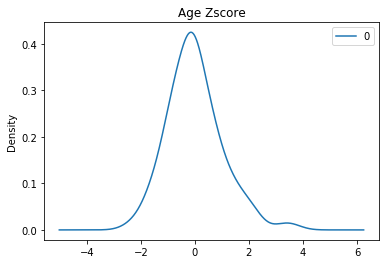

In [7]:
#Zscore plot
from scipy import stats
import matplotlib.pyplot as plot
def calcZscore(colname):
    Zscore=stats.zscore(data[colname])
    df=pd.DataFrame(Zscore)
    df.plot.kde()
    plot.title(colname+" Zscore")
    plot.show()
calcZscore('Age')

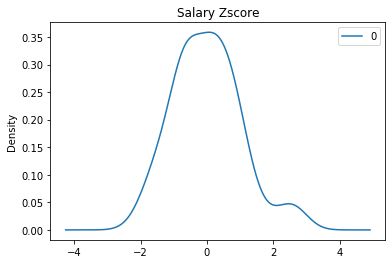

In [8]:
calcZscore('Salary')

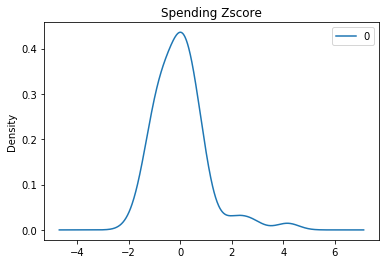

In [9]:
calcZscore('Spending')

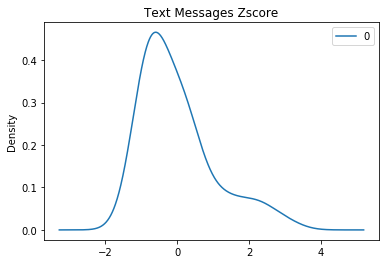

In [10]:
calcZscore('Text Messages')

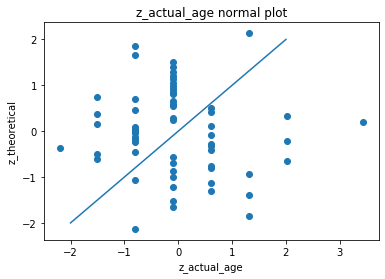

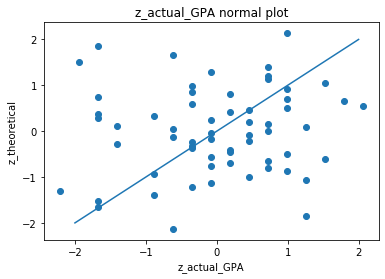

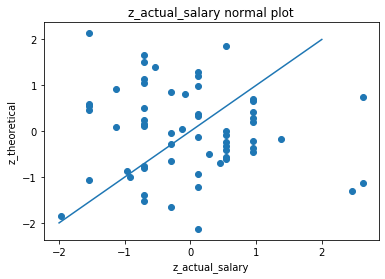

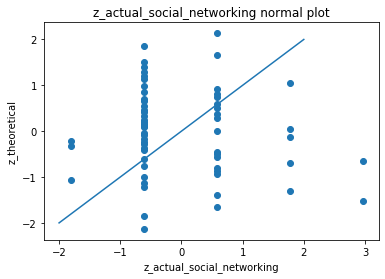

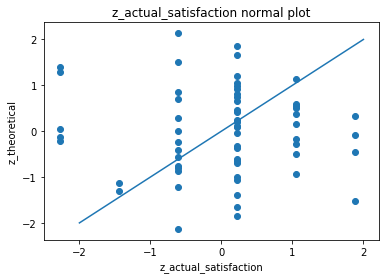

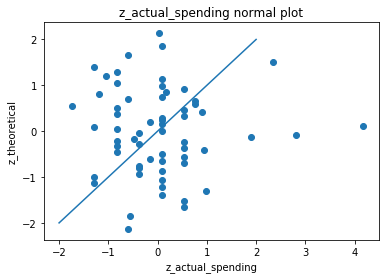

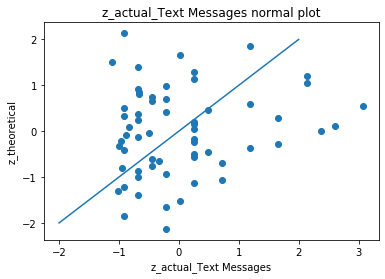

In [4]:
#Normal Dist plot
from scipy.special import ndtri
import matplotlib.pyplot as plt
data['count']=data.index+1
n_rows=data.shape[0]
data['percentile area']=data['count']/n_rows
data['z_theoretical']=ndtri(data['percentile area'])

def normalplot(data,actualcolumn,columnname):
    data[actualcolumn]=(data[columnname]-data[columnname].mean())/data[columnname].std(ddof=0)
    plt.scatter(data[actualcolumn],data['z_theoretical'])
    plt.title(actualcolumn + " normal plot")
    plt.xlabel(actualcolumn)
    plt.ylabel("z_theoretical")            
    plt.plot([-2,-1,0,1,2],[-2,-1,0,1,2])
    plt.show()
    
normalplot(data,'z_actual_age','Age')
normalplot(data,'z_actual_GPA','GPA')
normalplot(data,'z_actual_salary','Salary')
normalplot(data,'z_actual_social_networking','Social Networking')
normalplot(data,'z_actual_satisfaction','Satisfaction')
normalplot(data,'z_actual_spending','Spending')
normalplot(data,'z_actual_Text Messages','Text Messages')

In [5]:
#Gaussiaon Test
from scipy.stats import shapiro
def gaussiantest(data,colindex):
        stat, p = shapiro(data.iloc[:,colindex])
        print(data.columns.values[colindex]+ " p Value " + str(p))
        alpha = 0.05
        if p > alpha:
            print(data.columns.values[colindex]+ ' if the p value is greater than the chosen alpha level, then the null hypothesis that the data came from a normally distributed population can not be rejected ')
        else:
            print(data.columns.values[colindex]+' if the p value is less than the chosen alpha level, then the null hypothesis is rejected and there is evidence that the data tested are not normally distributed')

gaussiantest(data,2)
gaussiantest(data,6)
gaussiantest(data,8)
gaussiantest(data,9)
gaussiantest(data,10)
gaussiantest(data,11)
gaussiantest(data,13)

Age p Value 0.0013503588270395994
Age if the p value is less than the chosen alpha level, then the null hypothesis is rejected and there is evidence that the data tested are not normally distributed
GPA p Value 0.11204058676958084
GPA if the p value is greater than the chosen alpha level, then the null hypothesis that the data came from a normally distributed population can not be rejected 
Salary p Value 0.028000956401228905
Salary if the p value is less than the chosen alpha level, then the null hypothesis is rejected and there is evidence that the data tested are not normally distributed
Social Networking p Value 2.546349548993021e-07
Social Networking if the p value is less than the chosen alpha level, then the null hypothesis is rejected and there is evidence that the data tested are not normally distributed
Satisfaction p Value 8.741713827475905e-05
Satisfaction if the p value is less than the chosen alpha level, then the null hypothesis is rejected and there is evidence that the